In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Load data

df = pd.read_csv("data/week2/2020225_jason_up.dat", delimiter='\t')
df = df.set_index("T(K)")
df = df.drop("Time(Min)", axis="columns")
df.head()



,(0 Deg.)M.S.(uV),(0 Deg.)STD(uV),(90 Deg.)M.S.(uV),(90 Deg.)STD(uV)
T(K),,,,
89.1,-63.78,0.0,28.08,0.04
89.2,-63.78,0.0,28.12,0.04
89.4,-63.78,0.0,28.11,0.03
89.5,-63.78,0.0,28.14,0.02
89.6,-63.78,0.0,28.14,0.03


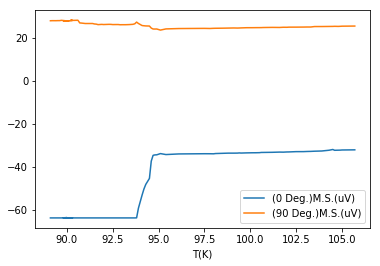

In [3]:
# View data
df.plot(None, ["(0 Deg.)M.S.(uV)", "(90 Deg.)M.S.(uV)"])

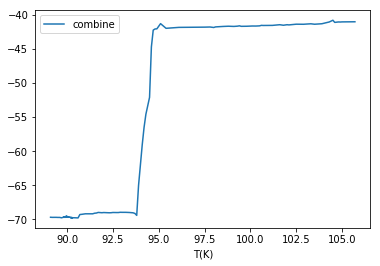

In [4]:
# Combine both channel 
df["combine"] = -(df["(0 Deg.)M.S.(uV)"]**2 + df["(90 Deg.)M.S.(uV)"]**2)**0.5

df.plot(None, "combine")

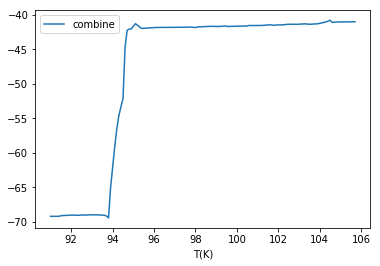

In [97]:
# Remove temperatures below 90.7 due to funny tail

keep = df.index > 90.8
df = df.loc[keep]
df = df[df.index != 91.7]


# Combine both channel 
df["combine"] = -(df["(0 Deg.)M.S.(uV)"]**2 + df["(90 Deg.)M.S.(uV)"]**2)**0.5

df.plot(None, "combine")

(-43, -40)

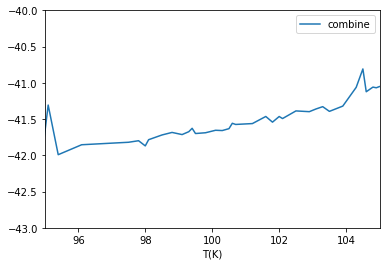

In [98]:
# Remove offset
df.plot(None, "combine")
plt.xlim([95,105])
plt.ylim([-43, -40])


[  0.08068329 -49.64569706]


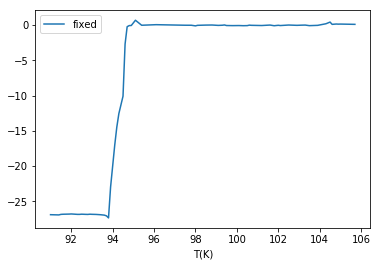

In [99]:
indices = (df.index > 95) & (df.index < 105)
values = df.iloc[indices]["combine"]
temps = values.index.values
volts = values.values

p_values = np.polyfit(temps, volts, 1)
print(p_values)
p_func = np.poly1d(p_values)

df["fixed"] = df["combine"] - p_func(df.index.values)
df.plot(None, "fixed")

Text(0.5, 0, 'Temperature (K)')

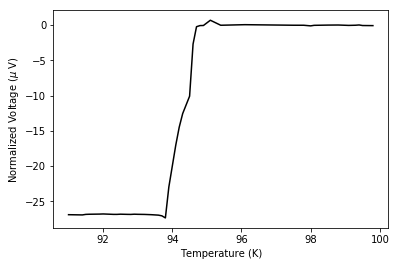

In [100]:
x = df.index.values
y = df["fixed"].values

indices = x < 100
x = x[indices]
y = y[indices]

plt.figure(figsize=(6,4))

plt.plot(x,y, c='k')
# plt.errorbar(x,y,xerr=0.5, fmt="none", c='k')

plt.ylabel("Normalized Voltage ($\mu$ V)")
plt.xlabel("Temperature (K)")

Text(0.5, 0, 'Temperature (K)')

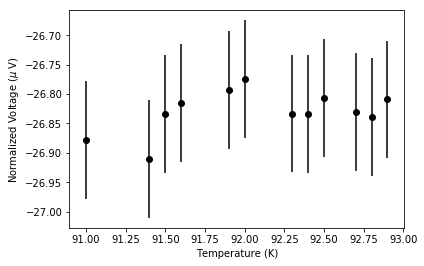

In [101]:
x = df.index.values
y = df["fixed"].values

indices = x < 93
x = x[indices]
y = y[indices]

plt.figure(figsize=(6,4))

plt.scatter(x,y, c='k')
plt.errorbar(x,y,yerr=0.1, fmt="none", c='k')

plt.ylabel("Normalized Voltage ($\mu$ V)")
plt.xlabel("Temperature (K)")

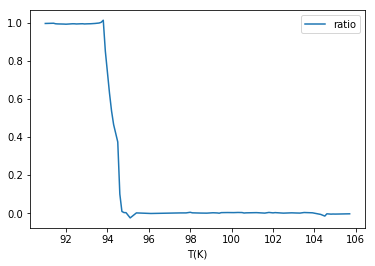

In [102]:
# Normalize voltage

df["ratio"] = df["fixed"] / (df["fixed"].iloc[0]-0.1)
df.plot(None, "ratio")

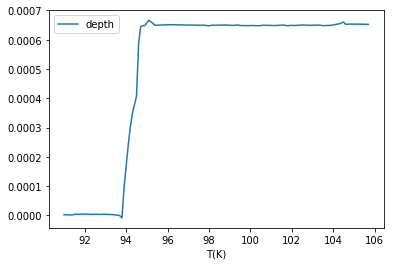

In [103]:
# Find length

len_0 = 3000e-10
thick = 1.3e-3 
len_func = lambda r: (thick - r*(thick-2*len_0))/2

df["depth"] = len_func(df["ratio"].values)
df.plot(None, "depth")

(93, 95)

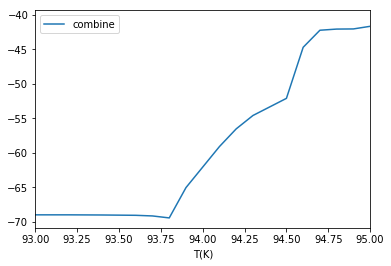

In [104]:
# Find T_c

df.plot(None, "combine")
plt.xlim([93,95])

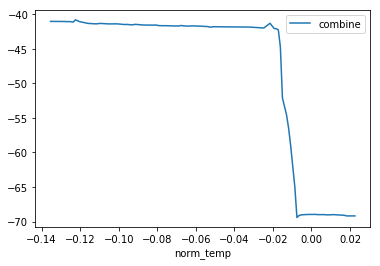

In [105]:
# Normalize temperature
T_c = 93.1
df["norm_temp"] = (T_c - df.index.values)/T_c

df.plot("norm_temp", "combine")


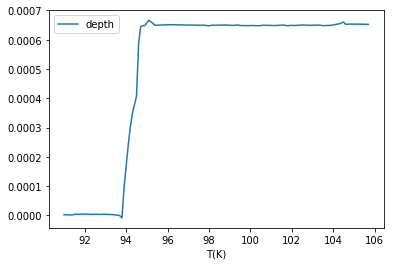

In [106]:
df.plot(None, "depth")

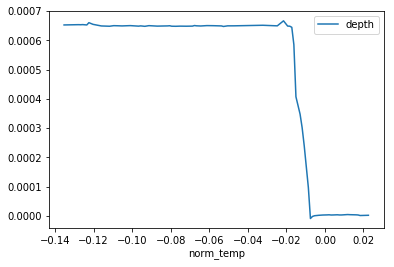

In [107]:
df.plot("norm_temp", "depth")

Text(0, 0.5, 'penetration depth')

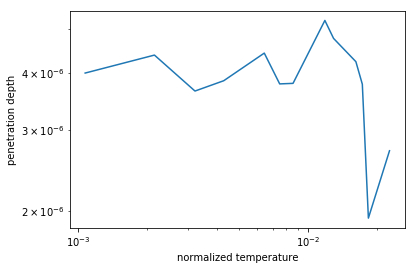

In [108]:
indices = (df["norm_temp"].values > 0)
temps = df.iloc[indices]["norm_temp"].values
depth = df.iloc[indices]["depth"].values

plt.loglog(temps, depth)
plt.xlabel("normalized temperature")
plt.ylabel("penetration depth")

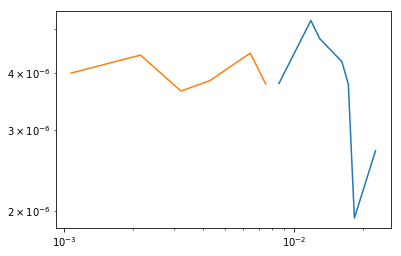

In [109]:
split = 7
plt.loglog(temps[:split], depth[:split])
plt.loglog(temps[split:], depth[split:])

# plt.xlim([1e-2, 6e-2])

[ -0.61728203 -15.13797216] [-9.39256611e-03 -1.24814413e+01]


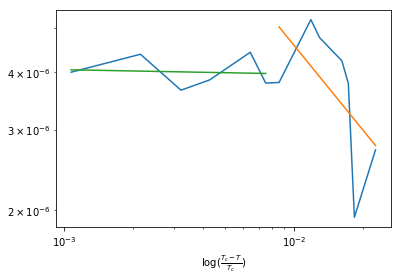

In [110]:
temps_log = np.log(temps)
depth_log = np.log(depth)

p_values1 = np.polyfit(temps_log[:split], depth_log[:split], 1)
# p_func1 = np.poly1d(p_values1)


p_values2 = np.polyfit(temps_log[split:], depth_log[split:], 1)
# p_func2 = np.poly1d(p_values2)

p_func = lambda p_values, temps : np.exp(p_values[1])*temps**p_values[0]


plt.loglog(temps, depth)

plt.loglog(temps[:split], p_func(p_values1, temps[:split]))
plt.loglog(temps[split:], p_func(p_values2, temps[split:]))

plt.xlabel(r"$\log(\frac{T_c - T}{T_c})$")

print(p_values1, p_values2)

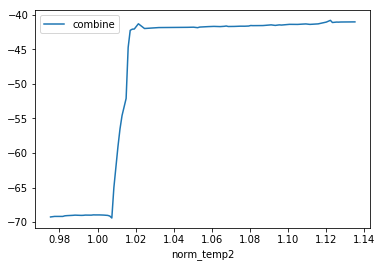

In [79]:
# Normalize temperature
T_c = 93.1
df["norm_temp2"] = (df.index.values)/T_c

df.plot("norm_temp2", "combine")


(0, 1e-05)

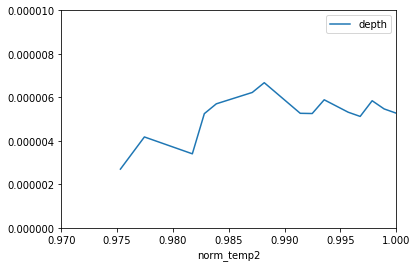

In [82]:
df.plot("norm_temp2", "depth")
plt.xlim([0.97,1])
plt.ylim([0, 1e-5])

Text(0, 0.5, 'penetration depth')

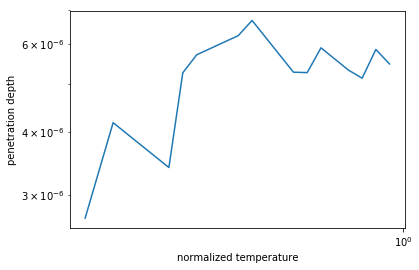

In [83]:
indices = (df["norm_temp2"].values < 1)
temps = df.iloc[indices]["norm_temp2"].values
depth = df.iloc[indices]["depth"].values

plt.loglog(temps, depth)
plt.xlabel("normalized temperature")
plt.ylabel("penetration depth")

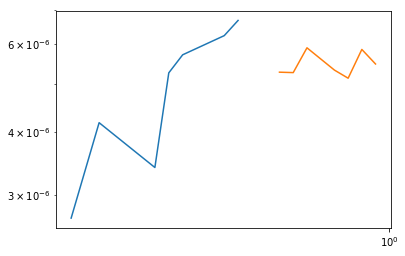

In [84]:
split = 7
plt.loglog(temps[:split], depth[:split])
plt.loglog(temps[split:], depth[split:])

# plt.xlim([1e-2, 6e-2])

[ 61.86318044 -11.17357669] [  3.90478345 -12.10156135]


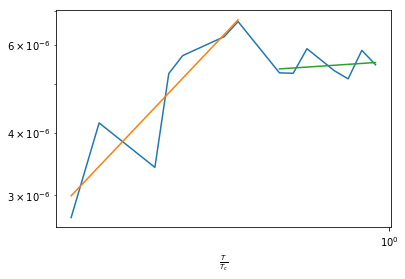

In [88]:
temps_log = np.log(temps)
depth_log = np.log(depth)

p_values1 = np.polyfit(temps_log[:split], depth_log[:split], 1)
# p_func1 = np.poly1d(p_values1)


p_values2 = np.polyfit(temps_log[split:], depth_log[split:], 1)
# p_func2 = np.poly1d(p_values2)

p_func = lambda p_values, temps : np.exp(p_values[1])*temps**p_values[0]


plt.loglog(temps, depth)

plt.loglog(temps[:split], p_func(p_values1, temps[:split]))
plt.loglog(temps[split:], p_func(p_values2, temps[split:]))

plt.xlabel(r"$\frac{T}{T_c}$")

print(p_values1, p_values2)